In [48]:
import os
participants_data_filename = "/home/martin/data_imaging/Muscle/data_sarcopenia_tx/Doc Unificado 30072025.xlsx"
pelvis_mri_results_path = "/home/martin/data_imaging/Muscle/data_sarcopenia_tx/nifti_pelvis/"
lumbar_mri_results_path = "/home/martin/data_imaging/Muscle/data_sarcopenia_tx/nifti_pelvis/"
output_dir = "/home/martin/data_imaging/Muscle/data_sarcopenia_tx/statistical_analysis/"

participants_data_filename = "d:/data_sarcopenia_tx/Doc Unificado 20082025.xlsx"
pelvis_mri_results_path = "d:/data_sarcopenia_tx/nifti_pelvis/"
lumbar_mri_results_path = "d:/data_sarcopenia_tx/nifti_pelvis/"
output_path = "d:/data_sarcopenia_tx/statistical_analysis/"

volume_ff_filename_per_subject = "volumes_and_ffs.csv"
column_names = ["VOL_LGMAX", "VOL_LGMED", "VOL_LGMIN", "VOL_LTFL", "VOL_RGMAX", "VOL_RGMED", "VOL_RGMIN", "VOL_RTFL",
                "FF_LGMAX", "FF_LGMED", "FF_LGMIN", "FF_LTFL", "FF_RGMAX", "FF_RGMED", "FF_RGMIN", "FF_RTFL"]
os.makedirs(output_dir, exist_ok=True)

import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt
import seaborn as sns   
import scipy.stats as stats

# Load the data
data = pd.read_excel(participants_data_filename, sheet_name='Doc Unificado')


In [49]:
import glob

# Get all subfolders in pelvis_mri_results_path
subfolders = [f.path for f in os.scandir(pelvis_mri_results_path) if f.is_dir()]

# For each subfolder, match to ID and add volume/ff data
for folder in subfolders:
    folder_name = os.path.basename(folder)
    # Find matching row in data
    idx = data.index[data['ID'] == folder_name]
    if not idx.empty:
        csv_path = os.path.join(folder, volume_ff_filename_per_subject)
        if os.path.exists(csv_path):
            vol_ff_df = pd.read_csv(csv_path, header=None)
            # Assuming single row, add columns to data
            for col in vol_ff_df.columns:
                # Assign values to named columns using column_names
                if col > 0 and col <= len(column_names):
                    data.loc[idx, column_names[col-1]] = vol_ff_df.iloc[0][col]

# Save the combined data to a new CSV file
combined_data_path = os.path.join(output_dir, "combined_data.csv")
data.to_csv(combined_data_path, index=False)
print(f"Combined data saved to {combined_data_path}")

Combined data saved to /home/martin/data_imaging/Muscle/data_sarcopenia_tx/statistical_analysis/combined_data.csv


In [50]:
# Create filtered data with the subjects with valid data and correct naming:
filtered_data = data[data['VOL_LGMAX'].notna()].copy()
filtered_data.rename(columns={'Grupo': 'Group'}, inplace=True)
filtered_data.rename(columns={'Sexo': 'Sex'}, inplace=True)
filtered_data['Group'] = filtered_data['Group'].replace({'trasplante': 'Transplant'})
filtered_data['Group'] = filtered_data['Group'].replace({'diálisis': 'Dialysis'})
filtered_data['Group'] = filtered_data['Group'].replace({'control': 'Healthy Control'})
filtered_data['Sex'] = filtered_data['Sex'].replace({'Masculino': 'Male', 'Femenino': 'Female'})

for muscle in ['GMAX', 'GMED', 'GMIN', 'TFL']:
    filtered_data[f'FF_{muscle}'] = (filtered_data[f'FF_L{muscle}'] + filtered_data[f'FF_R{muscle}']) / 2
    filtered_data[f'VOL_{muscle}'] = (filtered_data[f'VOL_L{muscle}'] + filtered_data[f'VOL_R{muscle}']) / 2
for muscle in ['GMAX', 'GMED', 'GMIN', 'TFL']:
    filtered_data[f'NORM_VOL_{muscle}'] = filtered_data[f'VOL_{muscle}'] / filtered_data['¿Cuál es su peso aproximadamente?\nPoner el peso en kilgramos']
    # now lean normalised volume:
    filtered_data[f'LEAN_NORM_VOL_{muscle}'] = filtered_data[f'NORM_VOL_{muscle}'] * (1-filtered_data[f'FF_{muscle}'])
    

ff_columns = [col for col in filtered_data.columns if col.startswith('FF_')]
filtered_data[ff_columns] = filtered_data[ff_columns] * 100

#vol_columns = [col for col in filtered_data.columns if col.startswith('VOL_')]
#filtered_data[vol_columns] = filtered_data[vol_columns] / 1000  

0          Transplant
1     Healthy Control
2     Healthy Control
3     Healthy Control
4     Healthy Control
5     Healthy Control
6     Healthy Control
8          Transplant
9          Transplant
12         Transplant
13         Transplant
14    Healthy Control
17           Dialysis
18           Dialysis
19         Transplant
Name: Group, dtype: object


C:\Users\Martin\AppData\Local\Temp\ipykernel_26536\983983409.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Group', y=f'FF_{muscle}', data=filtered_data, showfliers=False, palette='Set2')


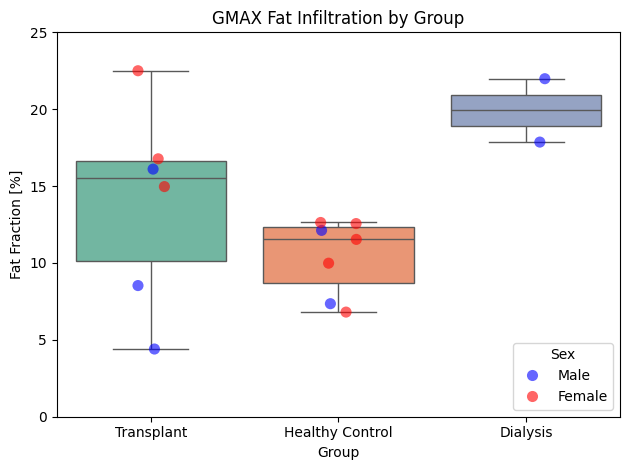

C:\Users\Martin\AppData\Local\Temp\ipykernel_26536\983983409.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Group', y=f'FF_{muscle}', data=filtered_data, showfliers=False, palette='Set2')


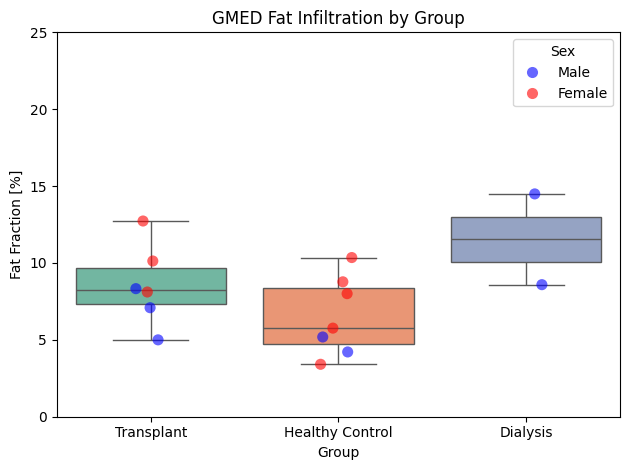

C:\Users\Martin\AppData\Local\Temp\ipykernel_26536\983983409.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Group', y=f'FF_{muscle}', data=filtered_data, showfliers=False, palette='Set2')


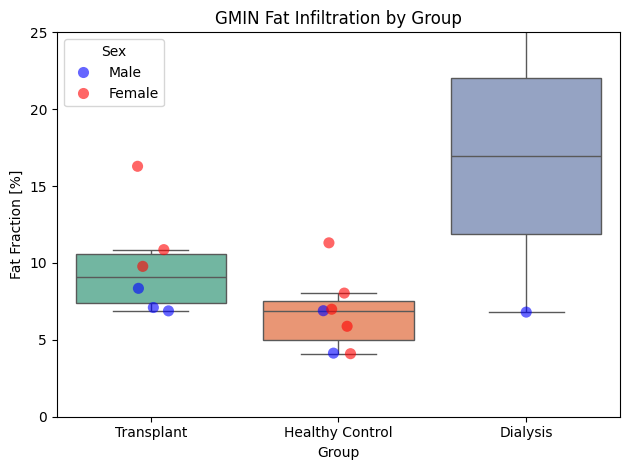

C:\Users\Martin\AppData\Local\Temp\ipykernel_26536\983983409.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Group', y=f'FF_{muscle}', data=filtered_data, showfliers=False, palette='Set2')


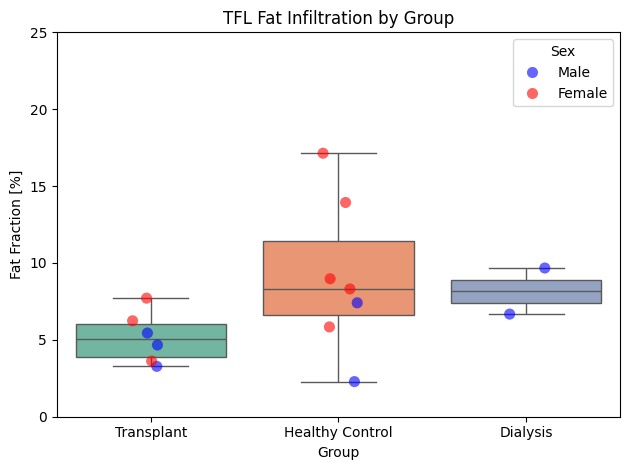

In [60]:
print(filtered_data['Group'])
# Plot box plots for fat fraction:

for muscle in ['GMAX', 'GMED', 'GMIN', 'TFL']:
    sns.boxplot(x='Group', y=f'FF_{muscle}', data=filtered_data, showfliers=False, palette='Set2')
    sns.stripplot(x='Group', y=f'FF_{muscle}', data=filtered_data, hue='Sex', 
                  palette={'Male': 'blue', 'Female': 'red'}, alpha=0.6, jitter=True, size=8, 
                  marker='o' if filtered_data['Sex'].iloc[0] == 'Male' else 'X')
    plt.ylabel('Fat Fraction [%]')
    plt.title(f'{muscle} Fat Infiltration by Group')
    plt.ylim(0, 25)
    plt.tight_layout()
    plt.savefig(os.path.join(output_path, f"boxplot_ff_{muscle}_by_group.png"))
    plt.show()
    plt.close()

C:\Users\Martin\AppData\Local\Temp\ipykernel_26536\2387573727.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Group', y=f'NORM_VOL_{muscle}', data=filtered_data, showfliers=False, palette='Set2')


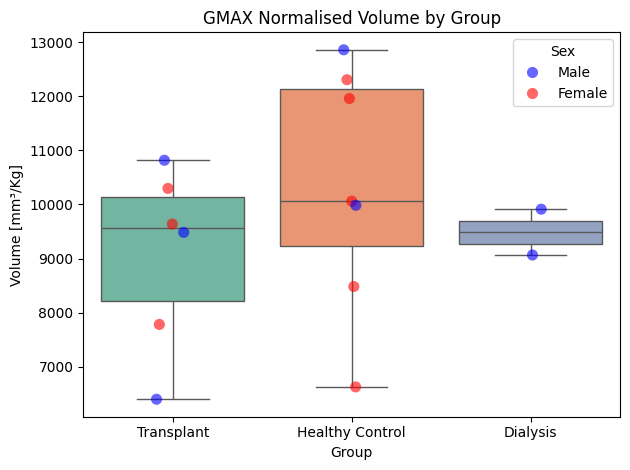

C:\Users\Martin\AppData\Local\Temp\ipykernel_26536\2387573727.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Group', y=f'NORM_VOL_{muscle}', data=filtered_data, showfliers=False, palette='Set2')


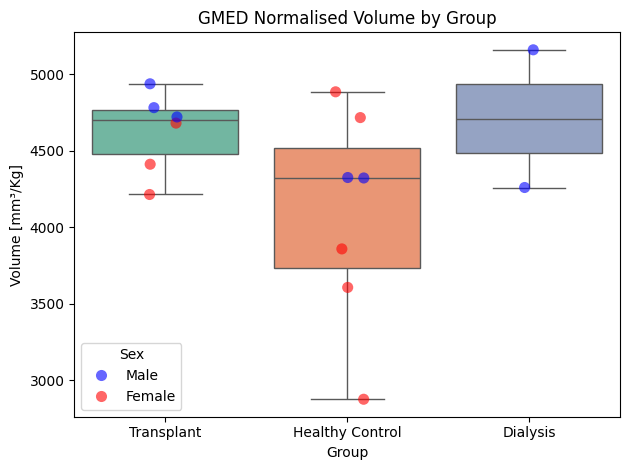

C:\Users\Martin\AppData\Local\Temp\ipykernel_26536\2387573727.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Group', y=f'NORM_VOL_{muscle}', data=filtered_data, showfliers=False, palette='Set2')


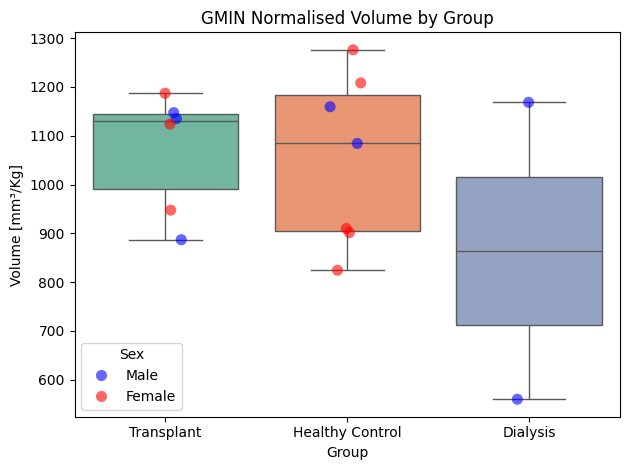

C:\Users\Martin\AppData\Local\Temp\ipykernel_26536\2387573727.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Group', y=f'NORM_VOL_{muscle}', data=filtered_data, showfliers=False, palette='Set2')


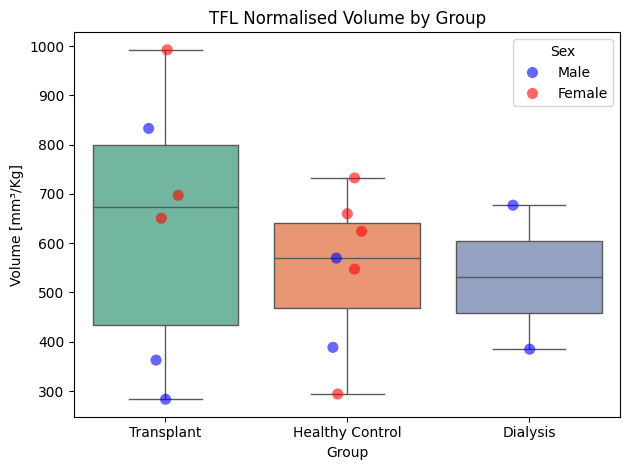

In [61]:
# Plot box plots for volume:

for muscle in ['GMAX', 'GMED', 'GMIN', 'TFL']:
    sns.boxplot(x='Group', y=f'NORM_VOL_{muscle}', data=filtered_data, showfliers=False, palette='Set2')
    sns.stripplot(x='Group', y=f'NORM_VOL_{muscle}', data=filtered_data, hue='Sex', 
                  palette={'Male': 'blue', 'Female': 'red'}, alpha=0.6, jitter=True, size=8, 
                  marker='o' if filtered_data['Sex'].iloc[0] == 'Male' else 'X')
    plt.ylabel('Volume [mm³/Kg]')
    plt.title(f'{muscle} Normalised Volume by Group')
    #plt.ylim(0, 25)
    plt.tight_layout()
    plt.savefig(os.path.join(output_path, f"boxplot_norm_vol_{muscle}_by_group.png"))
    plt.show()
    plt.close()


C:\Users\Martin\AppData\Local\Temp\ipykernel_26536\2291546559.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Group', y=f'LEAN_NORM_VOL_{muscle}', data=filtered_data, showfliers=False, palette='Set2')


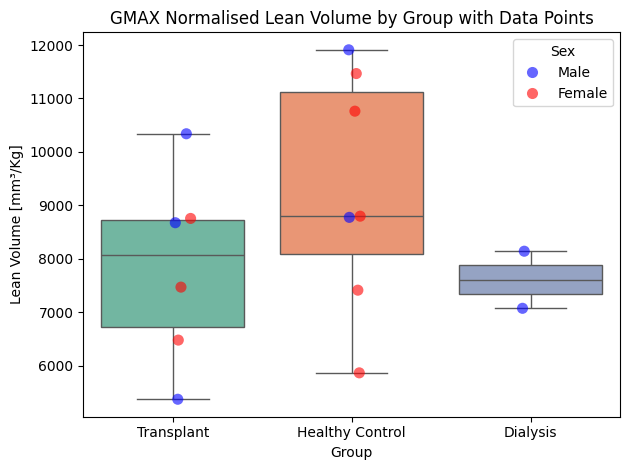

C:\Users\Martin\AppData\Local\Temp\ipykernel_26536\2291546559.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Group', y=f'LEAN_NORM_VOL_{muscle}', data=filtered_data, showfliers=False, palette='Set2')


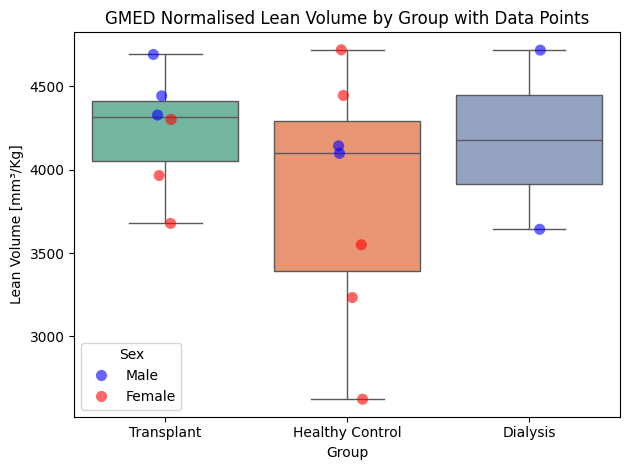

C:\Users\Martin\AppData\Local\Temp\ipykernel_26536\2291546559.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Group', y=f'LEAN_NORM_VOL_{muscle}', data=filtered_data, showfliers=False, palette='Set2')


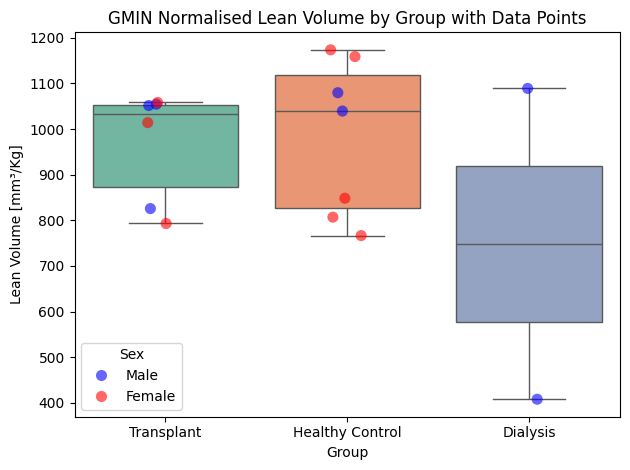

C:\Users\Martin\AppData\Local\Temp\ipykernel_26536\2291546559.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Group', y=f'LEAN_NORM_VOL_{muscle}', data=filtered_data, showfliers=False, palette='Set2')


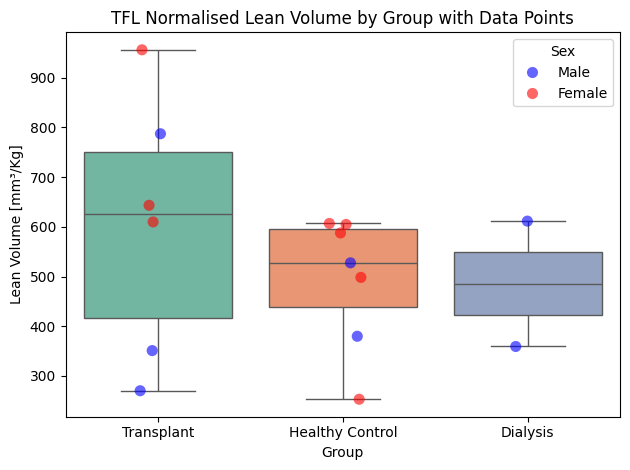

In [63]:
for muscle in ['GMAX', 'GMED', 'GMIN', 'TFL']:
    sns.boxplot(x='Group', y=f'LEAN_NORM_VOL_{muscle}', data=filtered_data, showfliers=False, palette='Set2')
    sns.stripplot(x='Group', y=f'LEAN_NORM_VOL_{muscle}', data=filtered_data, hue='Sex', 
                  palette={'Male': 'blue', 'Female': 'red'}, alpha=0.6, jitter=True, size=8, 
                  marker='o' if filtered_data['Sex'].iloc[0] == 'Male' else 'X')
    plt.ylabel('Lean Volume [mm³/Kg]')
    plt.title(f'{muscle} Normalised Lean Volume by Group with Data Points')
    #plt.ylim(0, 25)
    plt.tight_layout()
    plt.savefig(os.path.join(output_path, f"boxplot_lean_vol_{muscle}_by_group.png"))
    plt.show()
    plt.close()


C:\Users\Martin\AppData\Local\Temp\ipykernel_26536\1001115094.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Group', y=variable, data=filtered_data, showfliers=False, palette='Set2')


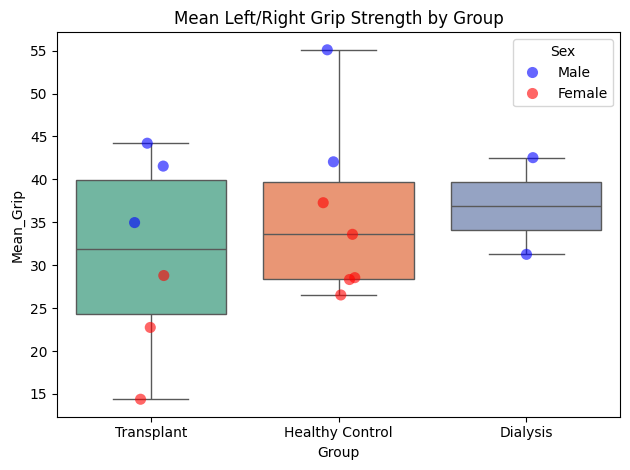

In [66]:
filtered_data['Mean_Izquierda'] = filtered_data[['Izquierda-1', 'Izquierda-2', 'Izquierda-3']].mean(axis=1)
filtered_data['Mean_Derecha'] = filtered_data[['Derecha-1', 'Derecha-2', 'Derecha-3']].mean(axis=1)
filtered_data['Max_Izquierda'] = filtered_data[['Izquierda-1', 'Izquierda-2', 'Izquierda-3']].max(axis=1)
filtered_data['Max_Derecha'] = filtered_data[['Derecha-1', 'Derecha-2', 'Derecha-3']].max(axis=1)
filtered_data['Mean_Grip'] = (filtered_data['Mean_Izquierda'] + filtered_data['Mean_Derecha']) / 2
filtered_data['Max_Grip'] = (filtered_data['Max_Izquierda'] + filtered_data['Max_Derecha']) / 2
variables_to_plot = ['Mean_Grip']#, 'Max_Grip']
# Create boxplots for Mean_Grip and Max_Grip by groups with points
for variable in variables_to_plot:
    sns.boxplot(x='Group', y=variable, data=filtered_data, showfliers=False, palette='Set2')
    sns.stripplot(x='Group', y=variable, data=filtered_data, hue='Sex', 
                  palette={'Male': 'blue', 'Female': 'red'}, alpha=0.6, jitter=True, size=8, 
                  marker='o' if filtered_data['Sex'].iloc[0] == 'Male' else 'X')
    plt.ylabel(f'{variable}')
    plt.title(f'Mean Left/Right Grip Strength by Group')
    plt.tight_layout()
    plt.savefig(os.path.join(output_path, f"boxplot_{variable}_by_group.png"))
    plt.show()
    plt.close()



Muscle: GMAX, R²: 0.18, Slope: -0.2237, R: -0.4220


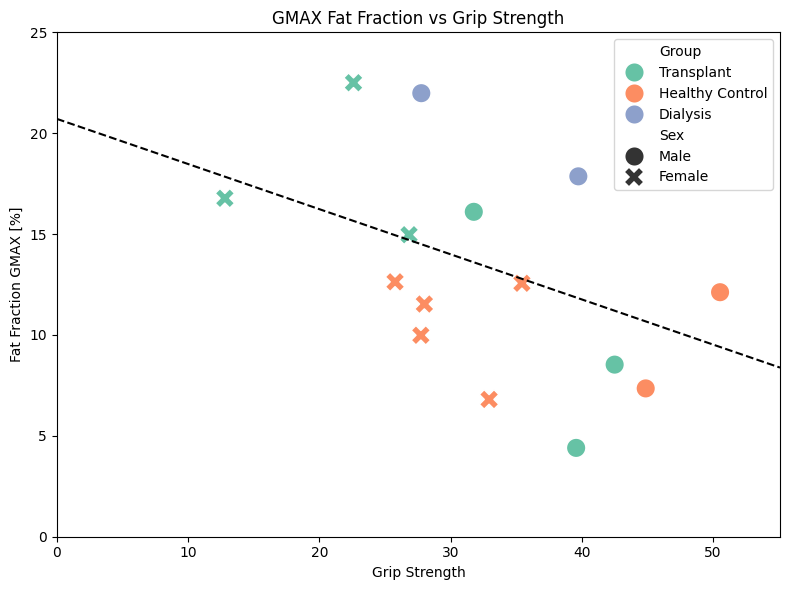

Muscle: GMED, R²: 0.30, Slope: -0.1675, R: -0.5454


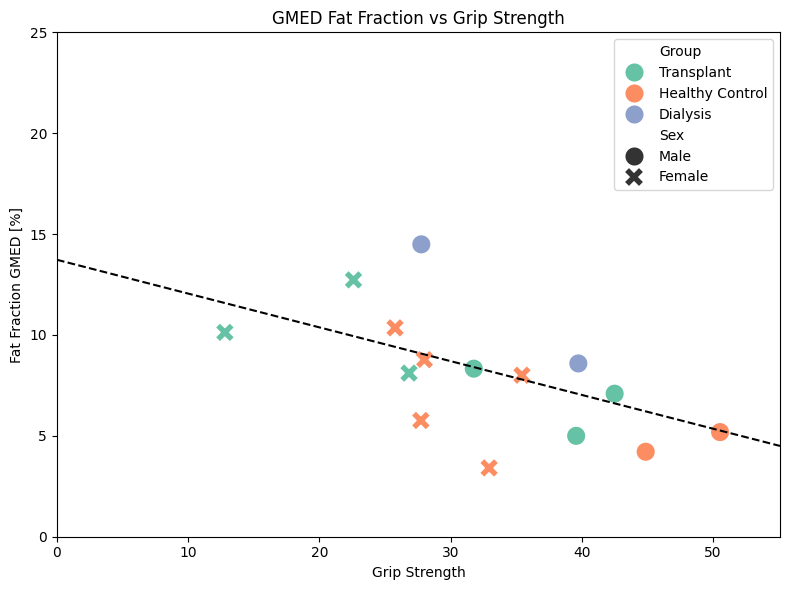

Muscle: GMIN, R²: 0.10, Slope: -0.1776, R: -0.3092


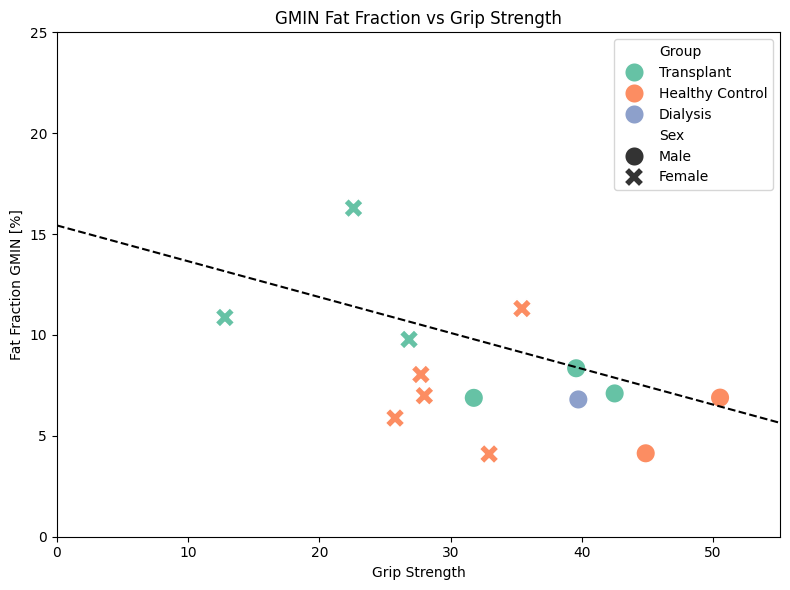

Muscle: TFL, R²: 0.00, Slope: -0.0038, R: -0.0097


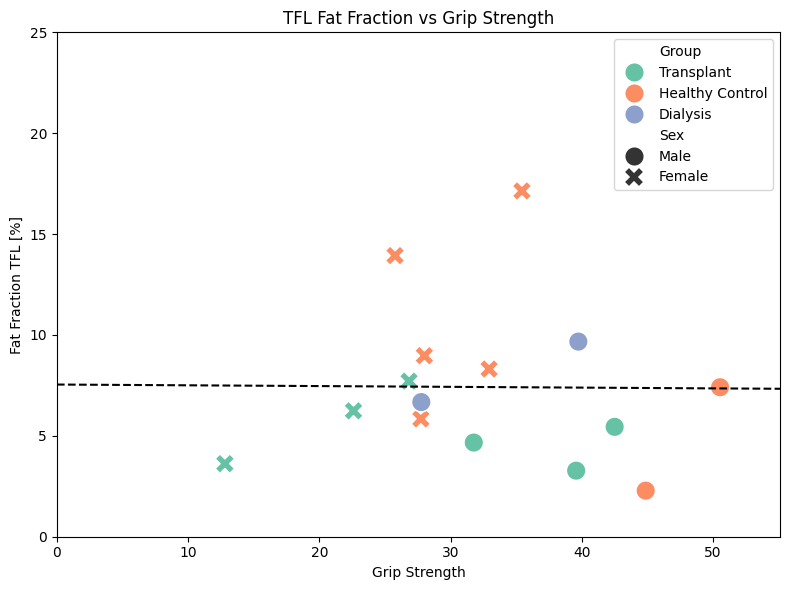

In [70]:
for muscle in ['GMAX', 'GMED', 'GMIN', 'TFL']:
    # Fit a linear regression model
    slope, intercept, r_value, p_value, std_err = stats.linregress(filtered_data['Mean_Grip'], filtered_data[f'FF_{muscle}'])
    # Add the regression line to the plot
    x_vals = np.linspace(0, filtered_data['Mean_Grip'].max(), 100)
    y_vals = slope * x_vals + intercept
    print(f"Muscle: {muscle}, R²: {r_value**2:.2f}, Slope: {slope:.4f}, R: {r_value:.4f}")
   # print(x_vals)
    
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='Mean_Izquierda', y=f'FF_{muscle}', data=filtered_data, hue='Group', style='Sex', palette='Set2', s=200)
    plt.plot(x_vals, y_vals, color='black', linestyle='--', label=f'Linear Fit (R²={r_value**2:.2f})')
    plt.xlabel('Grip Strength')
    plt.ylabel(f'Fat Fraction {muscle} [%]')
    plt.xlim(0, filtered_data['Mean_Grip'].max())
    plt.ylim(0, 25)
    #plt.legend()
    plt.title(f'{muscle} Fat Fraction vs Grip Strength')
    plt.tight_layout()
    plt.savefig(os.path.join(output_path, f"scatter_ff_{muscle}_vs_grip_strength.png"))
    plt.show()

C:\Users\Martin\AppData\Local\Temp\ipykernel_26536\3317127186.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Group', y='FF_GMAX', data=filtered_data, palette='muted', inner=None)
C:\Users\Martin\AppData\Local\Temp\ipykernel_26536\3317127186.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Group', y='FF_GMAX', data=filtered_data, palette='muted', inner=None)
C:\Users\Martin\AppData\Local\Temp\ipykernel_26536\3317127186.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Group', y='FF_GMAX', data=filtered_data, pal

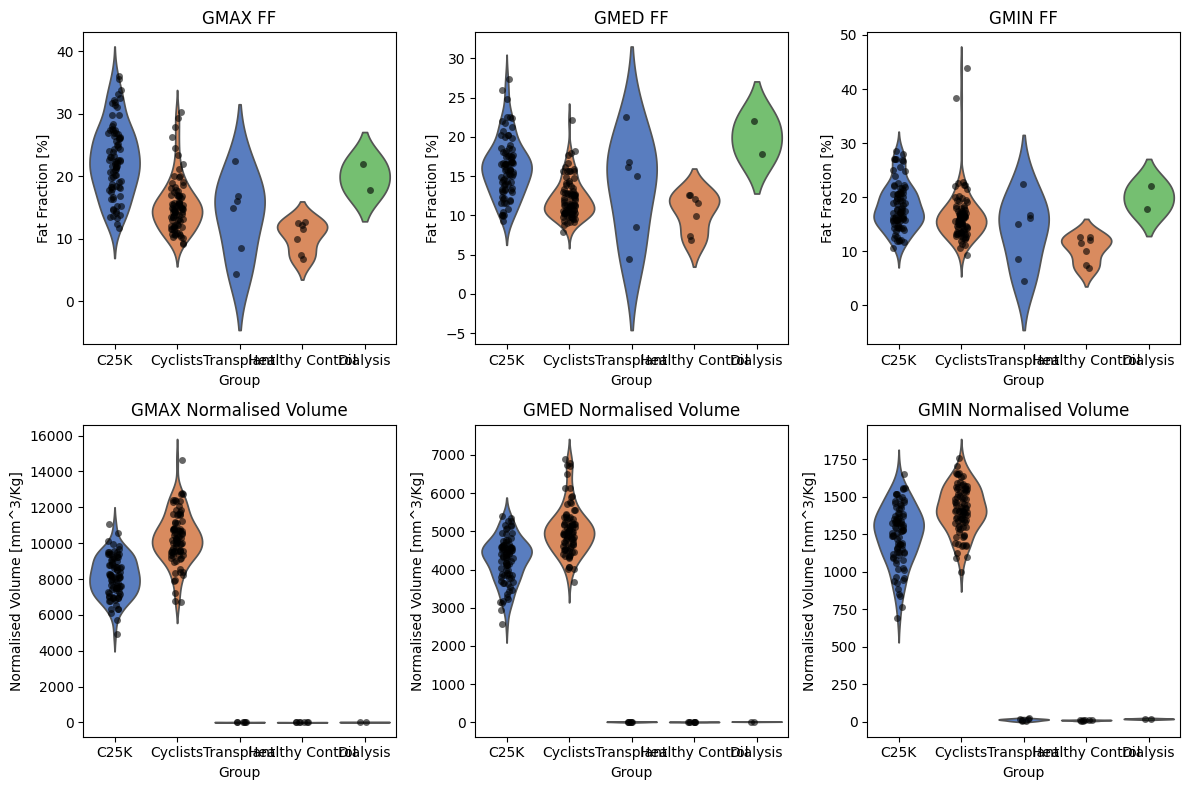

In [ ]:
# Now compare to groups from a different study (warning: different protocol)
results_cto5k_filename = "D:/Work/Publications/2025_CoreScore/DataAnalysis/CoreScore/merged_data.csv"
cto5k_pd = pd.read_csv(results_cto5k_filename)
# Variable names:
names_ff_to_merge = [
    'ffMeanSides_1', 'ffMeanSides_2', 'ffMeanSides_3', 'ffMeanSides_4', 'GMAX', 'GMED', 'GMIN']
names_vol_to_merge = [
    'meanVolume_mm3_1', 'meanVolume_mm3_2', 'meanVolume_mm3_3', 'meanVolume_mm3_4', 'GMAX_vol', 'GMED_vol', 'GMIN_vol']
names_nvol_to_merge = [
    'normMeanVolume_mm3_1', 'normMeanVolume_mm3_2', 'normMeanVolume_mm3_3', 'normMeanVolume_mm3_4', 'GMAX_nvol', 'GMED_nvol', 'GMIN_nvol']
names_lvol_to_merge = [
    'meanLeanVolume_mm3_1', 'meanLeanVolume_mm3_2', 'meanLeanVolume_mm3_3', 'meanLeanVolume_mm3_4', 'GMAX_lvol', 'GMED_lvol', 'GMIN_lvol']
names_nlvol_to_merge = [
    'normMeanLeanVolume_mm3_1', 'normMeanLeanVolume_mm3_2', 'normMeanLeanVolume_mm3_3', 'normMeanLeanVolume_mm3_4', 'GMAX_nlvol', 'GMED_nlvol', 'GMIN_nlvol']

# Set up the figure
plt.figure(figsize=(12, 8))
variables_to_plot = ['GMAX', 'GMED', 'GMIN', 'GMAX_nvol', 'GMED_nvol', 'GMIN_nvol']
variables_names_for_titles = {
    'GMAX': 'GMAX FF',
    'GMED':  'GMED FF',
    'GMIN':  'GMIN FF',
    'GMAX_nvol': 'GMAX Normalised Volume',
    'GMED_nvol': 'GMED Normalised Volume',
    'GMIN_nvol': 'GMIN Normalised Volume'
}
ylabel_names = {
    'GMAX': 'Fat Fraction [%]',
    'GMED':  'Fat Fraction [%]',
    'GMIN': 'Fat Fraction [%]',
    'GMAX_nvol': 'Normalised Volume [mm^3/Kg]',
    'GMED_nvol': 'Normalised Volume [mm^3/Kg]',
    'GMIN_nvol': 'Normalised Volume [mm^3/Kg]',
}

#Equise both measurements:
offset_protocols = -2
cto5k_pd_copy = cto5k_pd.copy()
cto5k_pd_copy['GMAX'] = cto5k_pd_copy['GMAX'] + offset_protocols
cto5k_pd_copy['GMED'] = cto5k_pd_copy['GMED'] + offset_protocols
cto5k_pd_copy['GMIN'] = cto5k_pd_copy['GMIN'] + offset_protocols

# Plot violin plots with individual dots for each variable
for i, variable in enumerate(variables_to_plot, 1):
    plt.subplot(2, 3, i)  # Create a subplot grid
    sns.violinplot(x='group', y=variable, data=cto5k_pd, palette='muted', inner=None, hue='group', split=False)
    sns.stripplot(x='group', y=variable, data=cto5k_pd, color='black', alpha=0.6, jitter=True)
    sns.violinplot(x='Group', y='FF_GMAX', data=filtered_data, palette='muted', inner=None)
    sns.stripplot(x='Group', y='FF_GMAX', data=filtered_data, color='black', alpha=0.6, jitter=True)
    plt.title(f'{variables_names_for_titles[variable]}')
    plt.xlabel('Group')
    plt.ylabel(f'{ylabel_names[variable]}')

# Adjust layout and show the plots
plt.tight_layout()
plt.savefig(output_path + "violin_plots_core_score_group.png")
plt.show()